## Clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('single_family_home_values.csv')
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [6]:
df2= df[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]
df3= df[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]

In [7]:
df2.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,NaN
2,3,1.0,0,1882,23875,1917.0,NaN
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0


In [8]:
df2.fillna(0, inplace=True)
df3.fillna(0, inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         15000 non-null  int64  
 1   bathrooms        15000 non-null  float64
 2   rooms            15000 non-null  int64  
 3   squareFootage    15000 non-null  int64  
 4   lotSize          15000 non-null  int64  
 5   yearBuilt        15000 non-null  float64
 6   priorSaleAmount  15000 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 820.4 KB


In [10]:
kmeans= KMeans(n_clusters= 5, random_state= 42)
kmeans.fit(df2)
labels= kmeans.labels_

In [11]:
# Centroides por cada columna
kmeans.cluster_centers_

array([[2.64373588e+00, 1.93760984e+00, 5.86806427e+00, 1.39591150e+03,
        5.94720500e+03, 1.93061122e+03, 3.78418574e+04],
       [3.29567308e+00, 3.77884615e+00, 8.35817308e+00, 2.64782572e+03,
        6.87523798e+03, 1.94106130e+03, 7.28504756e+05],
       [3.00000000e+00, 4.50000000e+00, 9.00000000e+00, 3.74800000e+03,
        8.59750000e+03, 1.99800000e+03, 1.37500550e+07],
       [2.69675623e+00, 2.26032110e+00, 6.18299476e+00, 1.46704817e+03,
        5.39934371e+03, 1.92557176e+03, 2.89554681e+05],
       [3.71875000e+00, 5.63541667e+00, 1.04583333e+01, 4.50402083e+03,
        1.29278229e+04, 1.96802083e+03, 2.35142638e+06]])

In [12]:
# Incorporar los cluster al Data Frame
df2['clusters']= labels
df2.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount,clusters
0,3,2.0,6,1378,9968,2003.0,165700.0,3
1,2,2.0,6,1653,6970,2004.0,0.0,0
2,3,1.0,0,1882,23875,1917.0,0.0,0
3,4,3.0,0,2400,11500,1956.0,0.0,0
4,3,4.0,8,2305,5600,1998.0,0.0,0


In [13]:
df2.groupby('clusters').mean()  # Se puede verificar la comparación de los centroides con esta consulta

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
clusters,,,,,,,
0,2.643736,1.937610,5.868064,1395.911499,5947.204996,1930.611223,3.784186e+04
1,3.297590,3.781928,8.361446,2650.091566,6877.125301,1941.112048,7.290337e+05
2,3.000000,4.500000,9.000000,3748.000000,8597.500000,1998.000000,1.375006e+07
3,2.696692,2.260400,6.183262,1467.126924,5399.570586,1925.569931,2.896266e+05
4,3.718750,5.635417,10.458333,4504.020833,12927.822917,1968.020833,2.351426e+06


In [14]:
from sklearn.metrics import silhouette_score

El silhouette score proporciona una medida para la calidad de los clusters formados. 
Un alto valor de silueta indica que el objeto está bien situado en su cluster y, por lo tanto, 
el clustering es apropiado. Esta métrica es útil cuando se necesita determinar el número 
óptimo de clusters para un conjunto de datos o para comparar diferentes algoritmos de clustering. 
Un conjunto de datos con un alto silhouette score tiene clusters claramente definidos y bien separados.

In [15]:
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df3)  # Asegúrate de usar fit_predict en lugar de solo fit
    print("Número de clusters:", i, "Puntuación de la silueta:", silhouette_score(df3, labels))

Número de clusters: 3 Puntuación de la silueta: 0.6145730276990463
Número de clusters: 4 Puntuación de la silueta: 0.6167009931907006
Número de clusters: 5 Puntuación de la silueta: 0.6335733333779898
Número de clusters: 6 Puntuación de la silueta: 0.6446120181544541
Número de clusters: 7 Puntuación de la silueta: 0.6576023767617936
Número de clusters: 8 Puntuación de la silueta: 0.6609859463366399
Número de clusters: 9 Puntuación de la silueta: 0.6569891108825006


#### 8 sería un número óptimo de clusters, ya que te tiene la puntación más alta

## Classification and Regression

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
X= df2.drop('clusters', axis=1)
y= df.estimated_value

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         15000 non-null  int64  
 1   bathrooms        15000 non-null  float64
 2   rooms            15000 non-null  int64  
 3   squareFootage    15000 non-null  int64  
 4   lotSize          15000 non-null  int64  
 5   yearBuilt        15000 non-null  float64
 6   priorSaleAmount  15000 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 820.4 KB


In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: estimated_value
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


In [21]:
lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.7648477834199695

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11250 entries, 333 to 12674
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         11250 non-null  int64  
 1   bathrooms        11250 non-null  float64
 2   rooms            11250 non-null  int64  
 3   squareFootage    11250 non-null  int64  
 4   lotSize          11250 non-null  int64  
 5   yearBuilt        11250 non-null  float64
 6   priorSaleAmount  11250 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 703.1 KB


In [23]:
lr_1= LinearRegression()
lr_1.fit(X_train, y_train)
lr_1.score(X_test, y_test)

0.7761183857211689

In [24]:
df['estimated_value_bins']= df['estimated_value'].apply(lambda x: 'high' if x> 500000 else 'low')

In [25]:
df['estimated_value_bins'].value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [26]:
y2= df['estimated_value_bins']

In [27]:
X_train, X_test, y2_train, y2_test= train_test_split(X, y2)

In [28]:
log= LogisticRegression()
log.fit(X_train, y2_train)
log.score(X_test, y2_test)

0.8213333333333334

In [29]:
y_pred= log.predict(X_test)

In [30]:
confusion_matrix(y2_test, y_pred)

array([[1602,  359],
       [ 311, 1478]])

In [31]:
svr= SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.06392932427466347

In [32]:
svc= SVC()
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7114666666666667

In [33]:
y2_pred= svc.predict(X_test)

In [34]:
confusion_matrix(y2_test, y2_pred)

array([[1031,  930],
       [ 152, 1637]])

In [35]:
knnr= KNeighborsRegressor()

In [36]:
knnr.fit(X_train, y_train)
knnr.score(X_test, y_test)

-0.11405194053972267

In [37]:
knnc= KNeighborsClassifier()
knnc.fit(X_train, y2_train)
knnc.score(X_test, y2_test)

0.8237333333333333

In [38]:
y2_pred= knnc.predict(X_test)

In [39]:
confusion_matrix(y2_test, y2_pred)

array([[1624,  337],
       [ 324, 1465]])

El **Mahalanobis** Rule (Regla de Mahalanobis) se utiliza en el contexto del análisis estadístico para identificar valores atípicos (outliers) en un conjunto de datos multivariado. La regla establece que si la distancia de Mahalanobis de un punto es mayor que un cierto umbral, entonces ese punto se considera un valor atípico. El umbral se determina a menudo utilizando una distribución chi-cuadrado, y los puntos que caen fuera de este umbral se consideran atípicos.

## Association and Correlation

In [40]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,1.000000,-0.007972,-0.092638,0.039591,0.076366,0.128491,0.094063,0.143069,0.045336,0.041342,0.069275,0.012363,0.126193
zipcode,-0.007972,1.000000,0.461953,0.394500,-0.018420,-0.007543,0.031346,0.000812,-0.037696,-0.174142,0.032898,0.033123,0.089104
latitude,-0.092638,0.461953,1.000000,0.499432,-0.083083,-0.237716,-0.213634,-0.256475,-0.092881,-0.105518,-0.126800,-0.225513,-0.266116
longitude,0.039591,0.394500,0.499432,1.000000,0.022375,0.107666,0.026108,0.067845,0.066228,0.060827,0.036747,0.097487,0.121984
bedrooms,0.076366,-0.018420,-0.083083,0.022375,1.000000,0.505931,0.712343,0.620965,0.158497,-0.061681,0.135036,0.211982,0.369125
bathrooms,0.128491,-0.007543,-0.237716,0.107666,0.505931,1.000000,0.686296,0.804179,0.259073,0.194597,0.296577,0.453678,0.715926
rooms,0.094063,0.031346,-0.213634,0.026108,0.712343,0.686296,1.000000,0.771194,0.175949,-0.047720,0.230537,0.370929,0.581023
squareFootage,0.143069,0.000812,-0.256475,0.067845,0.620965,0.804179,0.771194,1.000000,0.369244,0.115298,0.334441,0.506272,0.824506
lotSize,0.045336,-0.037696,-0.092881,0.066228,0.158497,0.259073,0.175949,0.369244,1.000000,0.285517,0.193421,0.226043,0.456539
yearBuilt,0.041342,-0.174142,-0.105518,0.060827,-0.061681,0.194597,-0.047720,0.115298,0.285517,1.000000,0.077553,0.113356,0.174430


<Axes: >

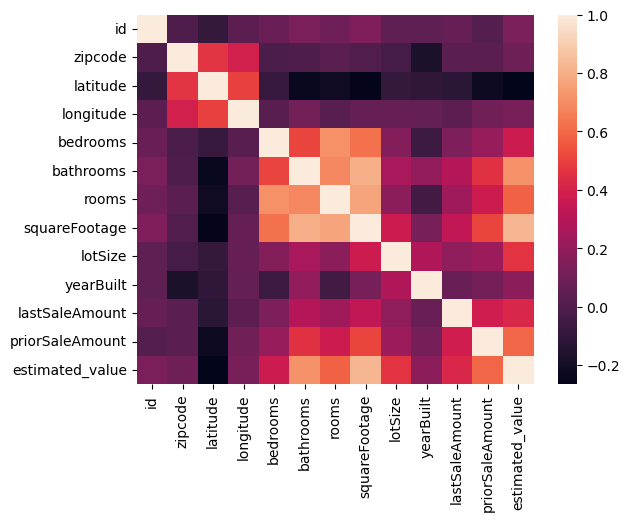

In [41]:
sns.heatmap(df.corr())

In [42]:
# Covarianza
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


bedrooms
mean 2.7084
std 0.8972307998543382


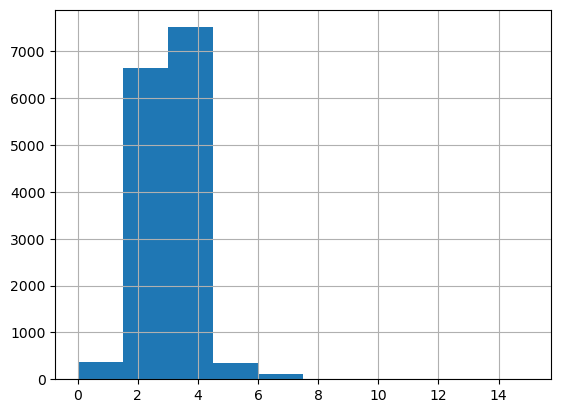

bathrooms
mean 2.1950666666666665
std 1.1662788442928953


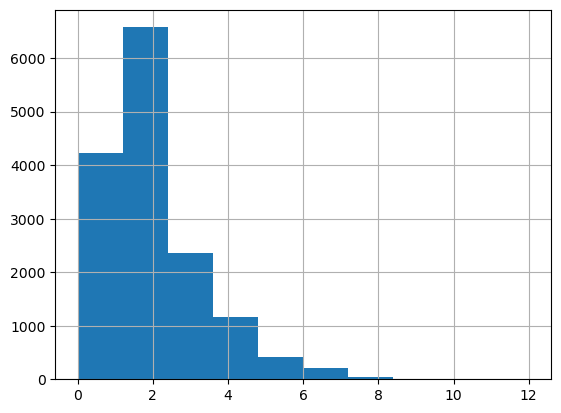

rooms
mean 6.164133333333333
std 1.958600518215801


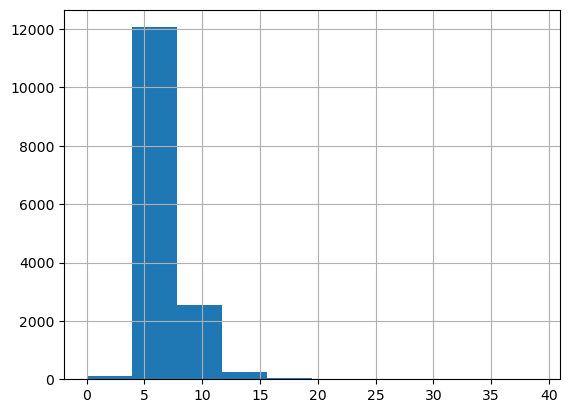

squareFootage
mean 1514.5044
std 830.6359987331762


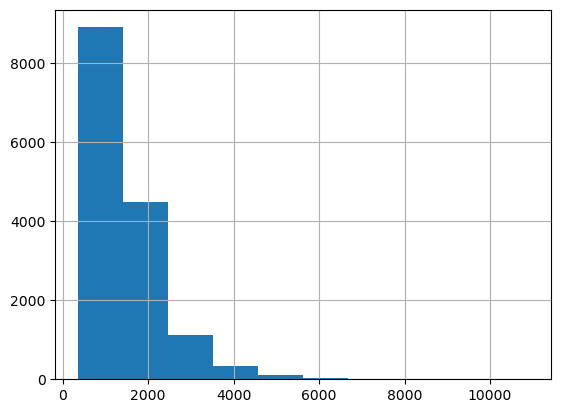

lotSize
mean 5820.7662
std 3013.279470369183


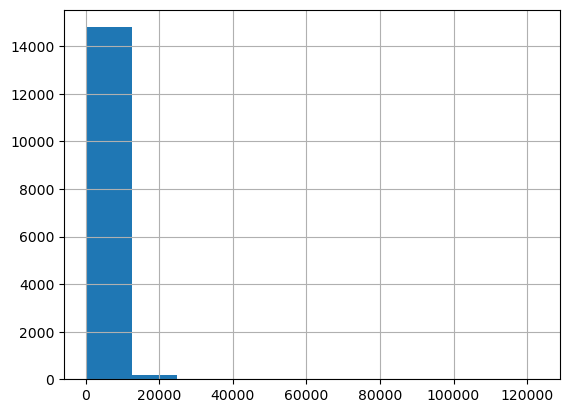

yearBuilt
mean 1929.3885333333333
std 33.82853430411162


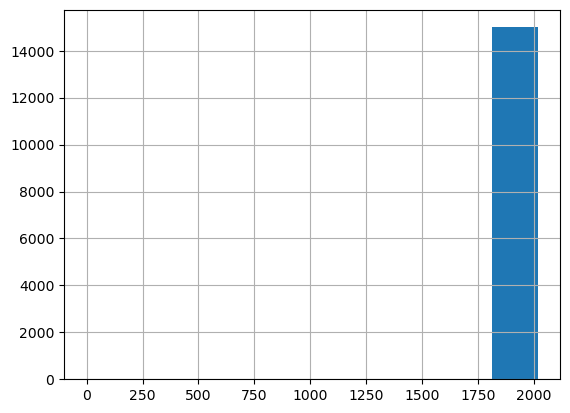

priorSaleAmount
mean 195216.20066666667
std 313797.90664518543


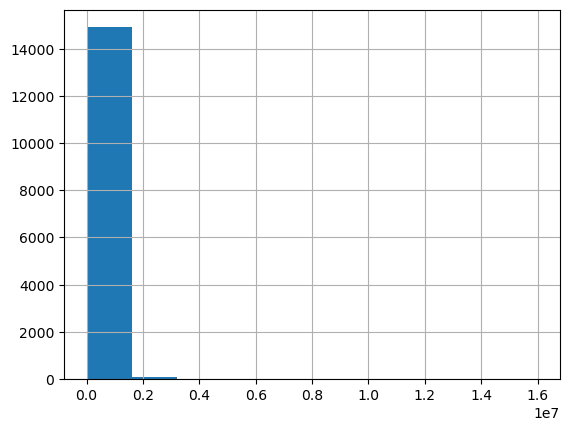

In [43]:
for i in X.columns:
    print("=======")
    print(i)
    X.loc[:,i].hist()
    print('mean', X.loc[:,i].mean())
    print('std', X.loc[:,i].std())
    plt.show()

In [44]:
from IPython.display import display, FileLink

In [45]:
display(FileLink('Snowflake Resource.pdf'))

/Users/felipemartinez/Snowflake Resource.pdf

In [46]:
import fitz
from PIL import Image as PILImage
from IPython.display import display

# Ruta al archivo PDF que quieres mostrar
pdf_path = 'Snowflake Resource.pdf'  # Reemplázalo con la ruta real de tu archivo PDF

# Función para mostrar el PDF como imágenes en el output
def display_pdf_images(pdf_path):
    # Abre el archivo PDF
    pdf_document = fitz.open(pdf_path)
    
    # Recorre las páginas del PDF y muestra cada página como una imagen
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        
        # Obtiene la rotación de la página
        rotation = page.rotation
        
        # Renderiza la página como una imagen
        image_data = page.get_pixmap()
        
        # Corrige la orientación de la imagen
        if rotation == 0:
            image = PILImage.frombytes("RGB", [image_data.width, image_data.height], image_data.samples)
        elif rotation == 90:
            image = PILImage.frombytes("RGB", [image_data.height, image_data.width], image_data.samples)
            image = image.rotate(-90, expand=True)
        elif rotation == 180:
            image = PILImage.frombytes("RGB", [image_data.width, image_data.height], image_data.samples)
            image = image.rotate(180, expand=True)
        elif rotation == 270:
            image = PILImage.frombytes("RGB", [image_data.height, image_data.width], image_data.samples)
            image = image.rotate(-270, expand=True)
        
        # Muestra la imagen en el output
        display(image)
    
    # Cierra el documento PDF
    pdf_document.close()

# Llama a la función para mostrar el PDF como imágenes
#display_pdf_images(pdf_path)



## Dimensionality Reduction

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca= PCA(4)
x_transformed= pca.fit_transform(X)
print(X.shape)
print(x_transformed.shape)
print(pca.components_.shape)
pca.components_[0]

(15000, 7)
(15000, 4)
(4, 7)


array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

In [49]:
X_train, X_test, y_train, y_test= train_test_split(x_transformed, y)

In [50]:
lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7130663461754254

### New Dataset from Kaggle

In [51]:
sns.set_style('white')

In [52]:
df= pd.read_csv('ESSdata.csv')

In [53]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [54]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [55]:
df.shape

(8594, 13)

In [56]:
import math

In [57]:
df_pca= df.loc[((df['cntry']== 'CZ') | (df['cntry']== 'CH')) & (df['year']==6),['tvtot', 'ppltrst', 'pplfair', 'pplhlp']].dropna()
df_pca

,tvtot,ppltrst,pplfair,pplhlp
0,3.0,3.0,10.0,5.0
1,6.0,5.0,7.0,5.0
2,1.0,8.0,8.0,8.0
3,4.0,6.0,6.0,7.0
4,5.0,6.0,7.0,5.0
...,...,...,...,...
2199,6.0,3.0,5.0,4.0
2200,3.0,9.0,7.0,5.0
2201,5.0,0.0,2.0,0.0
2202,4.0,4.0,4.0,4.0


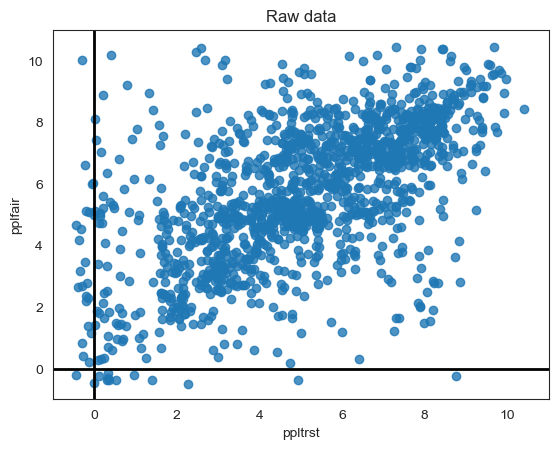

In [58]:
t= sns.regplot(x='ppltrst', y='pplfair', data=df_pca, x_jitter= 0.49, y_jitter= 0.49, fit_reg= False)
t.set(xlim=(-1,11), ylim=(-1,11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

In [59]:
#Standarizing variables by subtracting the mean and dividing by the standard deviation
df_pca['ppltrst_z']= (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z']= (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

A **z-score** is a measure of how many standard deviations a particular value is away from the mean of the population. Z-scores are calculated by subtracting the mean from each value and then dividing by the standard deviation.

The resulting z-scores are standardized, meaning that they have a mean of 0 and a standard deviation of 1. This makes it easy to compare values from different distributions.

La principal diferencia entre los **z-scores y el standard scaler** es que los z-scores se basan en la media y la desviación estándar de la **población**, mientras que el standard scaler se basa en la media y la desviación estándar de la **muestra**.

La media y la desviación estándar de la población son valores que se calculan a partir de una gran cantidad de datos. Esto significa que son más precisos que la media y la desviación estándar de la muestra, que se calculan a partir de un conjunto de datos más pequeño.

Por lo tanto, los z-scores son más precisos que el standard scaler para comparar valores de diferentes distribuciones. Esto se debe a que los z-scores se basan en la media y la desviación estándar de la población, que son valores que son más probables que sean representativos de la distribución completa de los datos.

El standard scaler, por otro lado, es más adecuado para preparar datos para el aprendizaje automático. Esto se debe a que el standard scaler hace que los datos tengan una media de 0 y una desviación estándar de 1, lo que puede mejorar el rendimiento de los algoritmos de aprendizaje automático.

En general, los z-scores son más adecuados para los siguientes casos:

Comparar valores de diferentes distribuciones
Analizar datos de una población
Obtener una medida precisa de la distancia de un valor a la media
El standard scaler es más adecuado para los siguientes casos:

Preparar datos para el aprendizaje automático
Normalizar los datos para que tengan una distribución similar
En el caso específico del código que proporcionaste, los z-scores y el standard scaler producirían resultados similares. Sin embargo, los z-scores serían más precisos, ya que se basan en la media y la desviación estándar de la población.

En resumen, la elección entre z-scores y standard scaler depende del propósito de tu análisis. Si necesitas comparar valores de diferentes distribuciones o analizar datos de una población, los z-scores son la mejor opción. Si necesitas preparar datos para el aprendizaje automático, el standard scaler es la mejor opción.

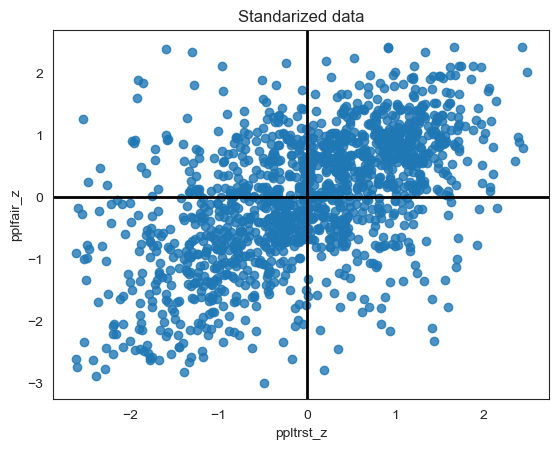

In [60]:
t= sns.regplot(x='ppltrst_z', y='pplfair_z', data=df_pca, x_jitter= 0.49, y_jitter= 0.49, fit_reg= False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standarized data')
plt.show()

In [61]:
df_pca= df.loc[((df['cntry']== 'CZ') | (df['cntry']== 'CH')) & (df['year']==6),['tvtot', 'ppltrst', 'pplfair', 'pplhlp']].dropna()

In [62]:
X= StandardScaler().fit_transform(df_pca)
Xt= X.T
Cx= np.cov(Xt)
print('Covariance Matrix: \n', Cx)

Covariance Matrix: 
 [[ 1.00071174 -0.24535312 -0.23531159 -0.17820482]
 [-0.24535312  1.00071174  0.60528939  0.49609931]
 [-0.23531159  0.60528939  1.00071174  0.53193085]
 [-0.17820482  0.49609931  0.53193085  1.00071174]]


### Eigenvectors & Eigenvalues

Los autovectores y autovalores se utilizan para reducir la dimensionalidad de los datos. La reducción de la dimensionalidad es el proceso de convertir un conjunto de datos de alta dimensionalidad en un conjunto de datos de baja dimensionalidad que conserva la información importante.

Los autovectores y autovalores se pueden utilizar para reducir la dimensionalidad de los datos mediante un proceso llamado análisis de componentes principales (PCA). El PCA encuentra los autovectores y autovalores de la matriz de covarianza de los datos. Los autovectores con autovalores más altos se utilizan para crear nuevas variables que representan las características más importantes de los datos.

Conclusión

Los autovectores y autovalores son herramientas poderosas que tienen una amplia gama de aplicaciones en la ciencia, la ingeniería y las matemáticas. En el aprendizaje automático, los autovectores y autovalores se utilizan para reducir la dimensionalidad de los datos y mejorar el rendimiento de los modelos de aprendizaje automático.

In [63]:
# Calculating eigenvalues and eigenvectors
eig_val_cov, eig_vec_cov= np.linalg.eig(Cx)

# Inspecting the Eigenvalues and Eigenvectors
for i in range(len(eig_val_cov)):
    eigvec_cov= eig_vec_cov[:,i].reshape(1,4).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print('---------------')

Eigenvector 1: 
[[-0.30084526]
 [ 0.55945823]
 [ 0.5681188 ]
 [ 0.52320135]]
Eigenvalue 1: 2.2112568631998215
---------------
Eigenvector 2: 
[[0.94786152]
 [0.11600843]
 [0.15403897]
 [0.25371751]]
Eigenvalue 2: 0.8847413570711695
---------------
Eigenvector 3: 
[[ 0.10491426]
 [ 0.51597659]
 [ 0.28505945]
 [-0.80093836]]
Eigenvalue 3: 0.5151421389236891
---------------
Eigenvector 4: 
[[ 0.00660771]
 [ 0.63821367]
 [-0.75647481]
 [ 0.14277786]]
Eigenvalue 4: 0.391706615894286
---------------


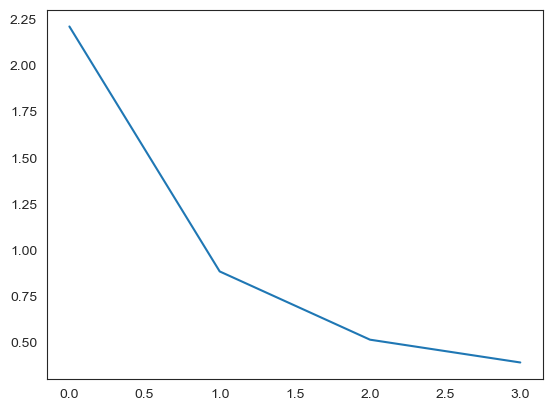

In [64]:
plt.plot(eig_val_cov)
plt.show()

In [65]:
print(eig_val_cov,'\n', eig_vec_cov)

[2.21125686 0.88474136 0.51514214 0.39170662] 
 [[-0.30084526  0.94786152  0.10491426  0.00660771]
 [ 0.55945823  0.11600843  0.51597659  0.63821367]
 [ 0.5681188   0.15403897  0.28505945 -0.75647481]
 [ 0.52320135  0.25371751 -0.80093836  0.14277786]]


## PuLP library

In [66]:
# Importar la biblioteca PuLP
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary

# Crear un problema de optimización
problema = LpProblem("Asignacion_De_Tareas", LpMinimize)

# Definir las trabajadores y tareas
trabajadores = ["W1", "W2", "W3"]
tareas = ["T1", "T2", "T3"]

# Crear un diccionario para almacenar los costos de asignación
costos = {
    ("W1", "T1"): 10,
    ("W1", "T2"): 6,
    ("W1", "T3"): 8,
    ("W2", "T1"): 9,
    ("W2", "T2"): 7,
    ("W2", "T3"): 4,
    ("W3", "T1"): 3,
    ("W3", "T2"): 5,
    ("W3", "T3"): 11
}

# Crear variables de decisión (binarias)
asignacion = LpVariable.dicts("Asignacion", (trabajadores, tareas), 0, 1, LpBinary)

# Definir la función objetivo
problema += lpSum(asignacion[worker][task] * costos[(worker, task)] for worker in trabajadores for task in tareas)

# Restricciones: cada tarea debe asignarse a exactamente un trabajador
for task in tareas:
    problema += lpSum(asignacion[worker][task] for worker in trabajadores) == 1

# Restricciones: cada trabajador puede realizar como máximo una tarea
for worker in trabajadores:
    problema += lpSum(asignacion[worker][task] for task in tareas) <= 1

# Resolver el problema
problema.solve()

# Imprimir los resultados
print("Estado:", problema.status)
print("Asignación óptima de tareas:")
for worker in trabajadores:
    for task in tareas:
        if asignacion[worker][task].value() == 1:
            print(f"{worker} realiza {task}")

# Imprimir el costo total de asignación
print("Costo total de asignación:", round(problema.objective.value(), 2))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/felipemartinez/anaconda3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/m5/nk71q_3n7hlftqfwdbrktxn40000gn/T/b8eacddaa373446197e7c31c956d3ab9-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/m5/nk71q_3n7hlftqfwdbrktxn40000gn/T/b8eacddaa373446197e7c31c956d3ab9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 57 RHS
At line 64 BOUNDS
At line 74 ENDATA
Problem MODEL has 6 rows, 9 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13 - 0.00 seconds
Cgl0004I processed model has 6 rows, 9 columns (9 integer (9 of which binary)) and 18 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 13
Cbc0038I Before mini branch and boun

### Apache Spark

In [67]:
import pyspark as ps

In [68]:
spark= ps.sql.SparkSession.builder.master('local[4]')\
.appName('spark-lecture').getOrCreate()

sc= spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/24 16:43:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [69]:
import random

In [70]:
n= 100

# Parallilize creates a RDD
heads= (sc.parallelize(range(n))
        .map(lambda _: random.random())
        .filter(lambda r: r <= 0.5)
        .count())

tails= n - heads
ratio= 1. * heads / n

print('heads= ', heads)
print('tails= ', tails)
print('ratio= ', ratio)

heads=  53
tails=  47
ratio=  0.53


In [71]:
# Resilient Distributed Datasets
rdd= sc.parallelize(range(n))

In [72]:
rdd2= rdd.map(lambda x: random.random())

In [73]:
rdd2.collect()

[0.9566344872267278,
 0.3184845956059248,
 0.7565767055027394,
 0.01421550817951589,
 0.053286961470580985,
 0.35943767304312146,
 0.8026681612410782,
 0.6851892571333252,
 0.6322089007118558,
 0.31310702630033527,
 0.305165087107387,
 0.5192578517182725,
 0.17148007886541938,
 0.42594040451075477,
 0.7996227573616653,
 0.05403775393869803,
 0.8012661278486362,
 0.39723912656604066,
 0.35143785625247226,
 0.3156301852380483,
 0.0736447886720466,
 0.6964216393215065,
 0.3947420192645348,
 0.6755854246337049,
 0.08227026853374908,
 0.8704696867126859,
 0.9535157731442027,
 0.7661317160331378,
 0.4709585606682437,
 0.6088497899932485,
 0.1552028088309273,
 0.4482259707179632,
 0.614025461646666,
 0.7912101587033896,
 0.32045599131953606,
 0.6227359918428548,
 0.0030584414398538984,
 0.45870324024321263,
 0.5033454992975203,
 0.37855199481435997,
 0.9046096838745056,
 0.040812217017537344,
 0.6858325336970383,
 0.8835454235643354,
 0.3487564811093785,
 0.25154093601293215,
 0.9348870076209

In [74]:
rdd3= rdd2.filter(lambda r: r <= 0.2)
rdd3.collect()

[0.07004858753718135,
 0.18150653305928532,
 0.007455821664128615,
 0.14361643346611308,
 0.10324171380803426,
 0.09466829522808506,
 0.1503365138679713,
 0.12677559898755797,
 0.12554642656020953,
 0.1800723770804774,
 0.08217164030751611,
 0.12084965537382575,
 0.022734522814035873,
 0.04492267218952284,
 0.015720688929269477,
 0.024010595567867665,
 0.08833907407246278,
 0.017204271310660046,
 0.1564543222547008,
 0.14594393245892345,
 0.13140041064326236,
 0.013470053644515811,
 0.010923157798247818,
 0.1386519311136113]

##### Action: collect, count, mean   & Transformation: map, filter 

In [75]:
def is_prime(x):
    pri=[]
    for a in range(1,x+1):
        for i in range(1,a+1):
            if a%i != 0:
                if i in pri:
                    continue
                pri.append(i)
            
    return pri
            
    

print(is_prime(100))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [76]:
def is_prime(x):
    primes = []
    for num in range(2, x + 1):
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

print(is_prime(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


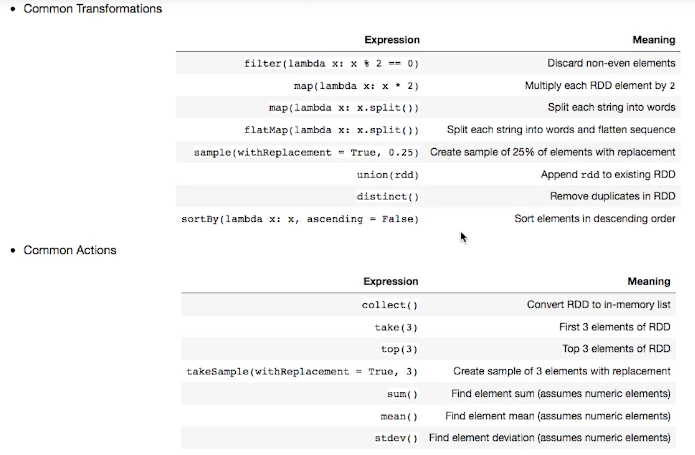

In [77]:
%%writefile input.txt
Hola esto esto es una prueba
para usar usar spark.
Este texto tiene tiene 4 4 
lineas lineas

Overwriting input.txt


In [78]:
# Conteo de lineas
sc.textFile('input.txt').map(lambda x: x.split()).count()

4

In [79]:
# Conteo de palabras
sc.textFile('input.txt').flatMap(lambda x: x.split()).count()

18

In [80]:
# Conteo de palabras
sc.textFile('input.txt').flatMap(lambda x: x.split()).map(lambda word: (word, 1)).reduceByKey(lambda count1, count2: count1 + count2).collect()

[('esto', 2),
 ('prueba', 1),
 ('para', 1),
 ('spark.', 1),
 ('Este', 1),
 ('4', 2),
 ('lineas', 2),
 ('Hola', 1),
 ('es', 1),
 ('una', 1),
 ('usar', 2),
 ('texto', 1),
 ('tiene', 2)]

In [81]:
# Varias filas de listas
sc.textFile('input.txt').map(lambda x: x.split()).collect()

[['Hola', 'esto', 'esto', 'es', 'una', 'prueba'],
 ['para', 'usar', 'usar', 'spark.'],
 ['Este', 'texto', 'tiene', 'tiene', '4', '4'],
 ['lineas', 'lineas']]

In [82]:
# Una sola lista
sc.textFile('input.txt').flatMap(lambda x: x.split()).collect()

['Hola',
 'esto',
 'esto',
 'es',
 'una',
 'prueba',
 'para',
 'usar',
 'usar',
 'spark.',
 'Este',
 'texto',
 'tiene',
 'tiene',
 '4',
 '4',
 'lineas',
 'lineas']

In [83]:
%%writefile sales.txt
#ID     Date         Store      State      Product      Amount
101     11/13/2014   100        WA         331          300.00
104     11/18/2014   700        OR         329          450.00
102     11/15/2014   203        CA         321          200.00
106     11/19/2014   202        CA         331          330.00
103     11/17/2014   101        WA         373          750.00
105     11/19/2014   202        CA         321          200.00

Overwriting sales.txt


In [84]:
# Toma las 2 primeras lineas
sc.textFile('sales.txt').take(2)

['#ID     Date         Store      State      Product      Amount',
 '101     11/13/2014   100        WA         331          300.00']

In [85]:
# Toma los 2 ID mas altos
sc.textFile('sales.txt').top(2)

['106     11/19/2014   202        CA         331          330.00',
 '105     11/19/2014   202        CA         321          200.00']

In [86]:
# Imprimir las 2 primeras lineas pero obviando la linea que empieza con numeral(#)


In [87]:
# Traer los 2 primeros Amount
sc.textFile('sales.txt').map(lambda x: x.split()).filter(lambda x: not x[0].startswith('#')).map(lambda x: x[-1]).take(2)

['300.00', '450.00']

In [88]:
# Suma de todos los Amount
sc.textFile('sales.txt').map(lambda x: x.split()).filter(lambda x: not x[0].startswith('#')).map(lambda x: float(x[-1])).sum()

2230.0

In [89]:
# Revenue por state
sc.textFile('sales.txt').map(lambda x: x.split()).filter(lambda x: not x[0].startswith('#')).map(lambda x: (x[-3], float(x[-1]))).reduceByKey(lambda amount1, amount2: amount1 + amount2).collect()

# Reduce By Key, reduce por llave en este caso actua por tuplas

[('CA', 730.0), ('WA', 1050.0), ('OR', 450.0)]

In [90]:
# Revenue by state order by total amount
sc.textFile('sales.txt').map(lambda x: x.split()).filter(lambda x: not x[0].startswith('#')).map(lambda x: (x[-3], float(x[-1]))).reduceByKey(lambda amount1, amount2: amount1 + amount2).sortBy(lambda state_amount: state_amount[1], ascending= False).collect()

[('WA', 1050.0), ('CA', 730.0), ('OR', 450.0)]

23/10/24 16:43:27 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [91]:
import pyspark.sql.functions as F
import pyspark as ps
from pyspark import SQLContext

In [92]:
spark= ps.sql.SparkSession.builder.master('local[2]').appName('spark-ml').getOrCreate()

sc= spark.sparkContext

23/10/24 17:35:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [93]:
sqlContext= SQLContext(sc)

In [96]:
# Read CSV, use Header, char for quotes, char for separation, do we infer schema or not
df_aapl= sqlContext.read.csv('aapl.csv', header= True, quote= '"', sep= ",", inferSchema= True)

df_aapl.show(5)

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2018-05-09|186.550003|187.399994|185.220001|187.360001|186.640305|23211200|
|2018-05-10|187.740005|190.369995|187.649994|190.039993|189.309998|27989300|
|2018-05-11|189.490005|190.059998|187.449997|188.589996|188.589996|26212200|
|2018-05-14|189.009995|189.529999|187.860001|188.149994|188.149994|20778800|
|2018-05-15|186.779999|187.070007|185.100006|186.440002|186.440002|23695200|
+----------+----------+----------+----------+----------+----------+--------+
only showing top 5 rows



In [97]:
df_aapl.schema

StructType([StructField('Date', DateType(), True), StructField('Open', DoubleType(), True), StructField('High', DoubleType(), True), StructField('Low', DoubleType(), True), StructField('Close', DoubleType(), True), StructField('Adj Close', DoubleType(), True), StructField('Volume', IntegerType(), True)])

In [98]:
df_out= df_aapl.select('Date', 'Close').orderBy('Close', ascending= False)
df_out.show(5)

+----------+----------+
|      Date|     Close|
+----------+----------+
|2018-06-06|193.979996|
|2018-06-07|193.460007|
|2018-06-05|193.309998|
|2018-06-04|191.830002|
|2018-06-08|191.699997|
+----------+----------+
only showing top 5 rows



In [99]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

In [103]:
# Assemble values in a vector
vectorAssembler= VectorAssembler(inputCols= ['Close'], outputCol= 'Features')

df_vector= vectorAssembler.transform(df_aapl)
df_aapl.show(5)
df_vector.show(5)

# Para usar ML se deben de pasar todos los features a vectores

+----------+----------+----------+----------+----------+----------+--------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|
+----------+----------+----------+----------+----------+----------+--------+
|2018-05-09|186.550003|187.399994|185.220001|187.360001|186.640305|23211200|
|2018-05-10|187.740005|190.369995|187.649994|190.039993|189.309998|27989300|
|2018-05-11|189.490005|190.059998|187.449997|188.589996|188.589996|26212200|
|2018-05-14|189.009995|189.529999|187.860001|188.149994|188.149994|20778800|
|2018-05-15|186.779999|187.070007|185.100006|186.440002|186.440002|23695200|
+----------+----------+----------+----------+----------+----------+--------+
only showing top 5 rows

+----------+----------+----------+----------+----------+----------+--------+------------+
|      Date|      Open|      High|       Low|     Close| Adj Close|  Volume|    Features|
+----------+----------+----------+----------+----------+----------+--------+------------+
|2018-05-09|

In [105]:
scaler= MinMaxScaler(inputCol= 'Features', outputCol= 'Scaled Features')

# Compute summary statistics and generate MinMaxScalerModel
scaler_model= scaler.fit(df_vector)

# Rescale each feature to range [min, max]
scaled_data= scaler_model.transform(df_vector)
scaled_data.select('Features', 'Scaled Features').show(15)

+------------+--------------------+
|    Features|     Scaled Features|
+------------+--------------------+
|[187.360001]|[0.13689742813492...|
|[190.039993]|[0.48630977478742...|
|[188.589996]|[0.2972618767306078]|
|[188.149994]|[0.23989523856459...|
|[186.440002]|[0.01694967847449...|
|[188.179993]|[0.24380645210076...|
|[186.990005]|[0.08865804137106...|
|[186.309998]|               [0.0]|
|[187.630005]|[0.17210004487615...|
|[187.160004]|[0.11082219317397...|
|[188.360001]|[0.26727555861161...|
|[188.149994]|[0.23989523856459...|
|[188.580002]|[0.2959588776946229]|
|[187.899994]|[0.20730070594542...|
|     [187.5]|[0.1551502360235288]|
+------------+--------------------+
only showing top 15 rows



### Machine Learning Pipeline

In [107]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import RegexTokenizer, HashingTF

# Prepare training documents from a list of (id, text, label) tuples
training= spark.createDataFrame([
    (0, "spark is like hadoop mapreduce", 1.0),
    (1, "spark light fire!!!", 0.0),
    (2, "elephants like simba", 0.0),
    (3, "hadoop is an elephant", 1.0),
    (4, "hadoop mapreduce", 1.0)
], ['id', 'text', 'label'])

In [108]:
training.show()

+---+--------------------+-----+
| id|                text|label|
+---+--------------------+-----+
|  0|spark is like had...|  1.0|
|  1| spark light fire!!!|  0.0|
|  2|elephants like simba|  0.0|
|  3|hadoop is an elep...|  1.0|
|  4|    hadoop mapreduce|  1.0|
+---+--------------------+-----+



In [109]:
regexTokenizer= RegexTokenizer(inputCol= 'text', outputCol= 'tokens', pattern= '\\W')  # Value of pattern refer to white spaces
hashing_tf= HashingTF(inputCol= 'tokens', outputCol= 'features')
lr= LogisticRegression(maxIter= 10, regParam= 0.001)

tokens= regexTokenizer.transform(training)
hashes= hashing_tf.transform(tokens)
logistic_model= lr.fit(hashes) # Uses columns named features/label by default

23/10/24 19:14:01 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/24 19:14:01 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [110]:
test= spark.createDataFrame([
    (5, "simba has a spark"),
    (6, "hadoop"),
    (7, "mapreduce in spark"),
    (8, "apache hadoop")
], ['id', 'text'])

In [111]:
# What do we need to do this to get a prediction?
preds= logistic_model.transform(hashing_tf.transform(regexTokenizer.transform(test)))
preds.select('text', 'prediction', 'probability').show()

+------------------+----------+--------------------+
|              text|prediction|         probability|
+------------------+----------+--------------------+
| simba has a spark|       0.0|[0.97028391175183...|
|            hadoop|       1.0|[0.04044539620506...|
|mapreduce in spark|       1.0|[0.13255280635740...|
|     apache hadoop|       1.0|[0.04044539620506...|
+------------------+----------+--------------------+

